In [1]:
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
movie = pd.read_csv('movies.csv')
ratings = pd.read_csv('ratings.csv')

In [3]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [4]:
ratings["rating"].describe(include='all')

count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: rating, dtype: float64

In [5]:
movie.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [6]:
movie.isnull().sum().sort_values(ascending=False).head(10)

movieId    0
title      0
genres     0
dtype: int64

In [7]:
duplicates_movie = movie[movie.duplicated(['title'], keep=False)]


In [8]:
duplicates_movie


,movieId,title,genres
650,838,Emma (1996),Comedy|Drama|Romance
2141,2851,Saturn 3 (1980),Adventure|Sci-Fi|Thriller
4169,6003,Confessions of a Dangerous Mind (2002),Comedy|Crime|Drama|Thriller
5601,26958,Emma (1996),Romance
5854,32600,Eros (2004),Drama
5931,34048,War of the Worlds (2005),Action|Adventure|Sci-Fi|Thriller
6932,64997,War of the Worlds (2005),Action|Sci-Fi
9106,144606,Confessions of a Dangerous Mind (2002),Comedy|Crime|Drama|Romance|Thriller
9135,147002,Eros (2004),Drama|Romance
9468,168358,Saturn 3 (1980),Sci-Fi|Thriller


In [9]:
mapping = {
    'Emma (1996)': 838,
    'Saturn 3 (1980)': 2851,
    'Confessions of a Dangerous Mind (2002)': 6003,
    'Eros (2004)': 32600,
    'War of the Worlds (2005)': 34048
}

movie['movieId'] = movie['title'].map(mapping).fillna(-1)
movie['movieId'] = movie['movieId'].astype(int)

In [10]:
duplicates_movie = movie[movie.duplicated(['title'], keep=False)]
duplicates_movie

,movieId,title,genres
650,838,Emma (1996),Comedy|Drama|Romance
2141,2851,Saturn 3 (1980),Adventure|Sci-Fi|Thriller
4169,6003,Confessions of a Dangerous Mind (2002),Comedy|Crime|Drama|Thriller
5601,838,Emma (1996),Romance
5854,32600,Eros (2004),Drama
5931,34048,War of the Worlds (2005),Action|Adventure|Sci-Fi|Thriller
6932,34048,War of the Worlds (2005),Action|Sci-Fi
9106,6003,Confessions of a Dangerous Mind (2002),Comedy|Crime|Drama|Romance|Thriller
9135,32600,Eros (2004),Drama|Romance
9468,2851,Saturn 3 (1980),Sci-Fi|Thriller


In [11]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


user rate movie onetime

In [12]:
duplicates_ratings = ratings[ratings.duplicated(['userId', 'movieId'], keep=False)]
duplicates_ratings

,userId,movieId,rating,timestamp


In [13]:
ratings.describe(include='all')

,userId,movieId,rating,timestamp
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,326.127564,19435.295718,3.501557,1.205946e+09
std,182.618491,35530.987199,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,177.000000,1199.000000,3.000000,1.019124e+09
50%,325.000000,2991.000000,3.500000,1.186087e+09
75%,477.000000,8122.000000,4.000000,1.435994e+09
max,610.000000,193609.000000,5.000000,1.537799e+09


Text(0.5, 0, 'User ID')

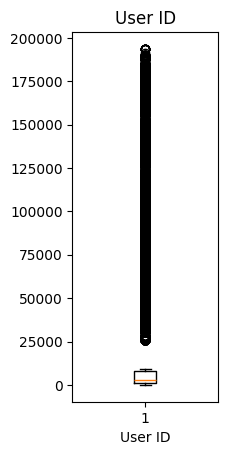

In [14]:
plt.subplot(1, 3, 1)
plt.boxplot(ratings['movieId'])
plt.title('User ID')
plt.xlabel('User ID')

In [15]:
merge_movie_ratings = pd.merge(ratings, movie, on= 'movieId', how= 'left', indicator=True)

In [16]:
merge_movie_ratings.head()

,userId,movieId,rating,timestamp,title,genres,_merge
0,1,1,4.0,964982703,NaN,NaN,left_only
1,1,3,4.0,964981247,NaN,NaN,left_only
2,1,6,4.0,964982224,NaN,NaN,left_only
3,1,47,5.0,964983815,NaN,NaN,left_only
4,1,50,5.0,964982931,NaN,NaN,left_only


In [17]:
merge_movie_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100936 entries, 0 to 100935
Data columns (total 7 columns):
 #   Column     Non-Null Count   Dtype   
---  ------     --------------   -----   
 0   userId     100936 non-null  int64   
 1   movieId    100936 non-null  int64   
 2   rating     100936 non-null  float64 
 3   timestamp  100936 non-null  int64   
 4   title      200 non-null     object  
 5   genres     200 non-null     object  
 6   _merge     100936 non-null  category
dtypes: category(1), float64(1), int64(3), object(2)
memory usage: 4.7+ MB


In [18]:
indicator_counts = merge_movie_ratings['_merge'].value_counts()
indicator_counts

_merge
left_only     100736
both             200
right_only         0
Name: count, dtype: int64

Text(0.5, 0, 'User ID')

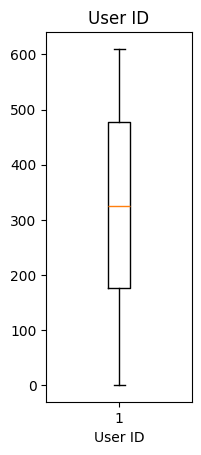

In [19]:
plt.subplot(1, 3, 1)
plt.boxplot(merge_movie_ratings['userId'])
plt.title('User ID')
plt.xlabel('User ID')

In [20]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [21]:
ratings= ratings.drop(columns='timestamp')

In [22]:
ratings.head()

,userId,movieId,rating
0,1,1,4.0
1,1,3,4.0
2,1,6,4.0
3,1,47,5.0
4,1,50,5.0


In [23]:
print(ratings.groupby(["rating"]).size().reset_index(name='count'))

   rating  count
0     0.5   1370
1     1.0   2811
2     1.5   1791
3     2.0   7551
4     2.5   5550
5     3.0  20047
6     3.5  13136
7     4.0  26818
8     4.5   8551
9     5.0  13211


In [24]:
print(ratings.groupby(["userId"]).size().reset_index(name='count'))

     userId  count
0         1    232
1         2     29
2         3     39
3         4    216
4         5     44
..      ...    ...
605     606   1115
606     607    187
607     608    831
608     609     37
609     610   1302

[610 rows x 2 columns]


In [25]:
grouped = ratings.groupby(['rating', 'userId']).size().reset_index(name='count')
sorted_grouped = grouped.sort_values(by='count', ascending=False)

In [26]:
sorted_grouped

,rating,userId,count
2853,4.0,414,903
1497,2.5,599,690
1899,3.0,414,658
2077,3.0,599,624
2363,3.5,474,580
...,...,...,...
494,1.0,560,1
3592,5.0,205,1
1074,2.0,439,1
1076,2.0,444,1


In [27]:
data = pd.read_csv('ratings.csv')